# K-means Clustering

## I. Introduction

**Goal of K-means clustering**: 
- Partition n observations into k clusters
- Each observation belongs to cluster with nearest mean (centroid)

**Cluster concept**: 
- Group of data points in multi-dimensional space
- Small inter-point distances within cluster
- Larger distances to points outside cluster

## II. Mathematical Formulation

1. **Cluster Prototypes**: 
   - D-dimensional vectors μₖ, where k = 1, ..., K
   - μₖ: prototype associated with k-th cluster
   - Represents cluster center

2. **Binary Indicator Variables**: 
   - Rₙₖ ∈ {0, 1}, where k = 1, ..., K
   - For each data point xₙ:
     Rₙₖ = 1 if xₙ assigned to cluster k
     Rₙₖ = 0 otherwise

3. **Objective Function (Distortion Measure)**:
   J = Σₙ₌₁ᴺ Σₖ₌₁ᴷ Rₙₖ ||xₙ - μₖ||²

   Interpretation:
   - Sum of squared distances between each data point and its assigned centroid
   - ||xₙ - μₖ||: Euclidean distance between point xₙ and centroid μₖ
   - Rₙₖ ensures only distance to assigned cluster is counted

   Goal: Find values for Rₙₖ and μₖ that minimize J

## III. Steps

1. **Initialization**: 
   - Choose initial values for μₖ
   - Methods:
     a) Select K random data points from dataset
     b) K-means++ algorithm (weighted probability selection)

2. **Assignment Step (Optimize Rₙₖ)**:
   For each data point xₙ:
   Rₙₖ = 1 if k = argminⱼ ||xₙ - μⱼ||²
   Rₙₖ = 0 otherwise

   Process:
   - Calculate distance from xₙ to each centroid μⱼ
   - Assign xₙ to nearest centroid (minimizes distance)
   - Update Rₙₖ accordingly

3. **Update Step (Optimize μₖ)**:
   For each cluster k:
   μₖ = (Σₙ₌₁ᴺ Rₙₖxₙ) / (Σₙ₌₁ᴺ Rₙₖ)

   Interpretation:
   - Numerator: Sum of all points assigned to cluster k
   - Denominator: Number of points in cluster k
   - Result: Mean of all points in cluster k

4. **Convergence Criteria**:
   Repeat steps 2 and 3 until:
   - No reassignment of data points to different clusters, or
   - Minimal change in centroids (within small tolerance level), or
   - Minimal decrease in sum of squared errors

## IV. Mathematical Optimization

**Two-Phase Iterative Optimization**:
1. Minimize J with respect to Rₙₖ, keeping μₖ fixed
2. Minimize J with respect to μₖ, keeping Rₙₖ fixed

**Derivation of Update Rule for μₖ**:
1. Take partial derivative of J with respect to μₖ:
   ∂J/∂μₖ = 2 Σₙ₌₁ᴺ Rₙₖ(xₙ - μₖ)

2. Set derivative to zero for minimization:
   2 Σₙ₌₁ᴺ Rₙₖ(xₙ - μₖ) = 0

3. Solve for μₖ:
   Σₙ₌₁ᴺ Rₙₖxₙ = μₖ Σₙ₌₁ᴺ Rₙₖ
   μₖ = (Σₙ₌₁ᴺ Rₙₖxₙ) / (Σₙ₌₁ᴺ Rₙₖ)

   This gives the update rule for centroids

## V. Probabilistic Interpretation

**Assumption**: 
- Data from mixture of K spherical Gaussian densities
- Equal variances (assume variance = 1)
- Different means μ₁, μ₂, ..., μₖ

**Probability Density Function of Mixture**:
P(x) = (1/K) Σₖ₌₁ᴷ (1/√(2π)) exp(-(x - μₖ)² / 2)

**Approximation** (due to fast decay of exponential function):
P(x) ≈ (1/√(2πK)) exp(-(x - μ(x))² / 2)

Where μ(x): center nearest to x

**Likelihood of Sample Points**:
L ≈ C * exp(-½ Σₙ₌₁ᴺ ||xₙ - μ(xₙ)||²)

C: constant term

**Connection to K-means**:
- Taking logarithm of likelihood:
  log(L) ≈ constant - ½ Σₙ₌₁ᴺ ||xₙ - μ(xₙ)||²
- Maximizing likelihood equivalent to minimizing Σₙ₌₁ᴺ ||xₙ - μ(xₙ)||²
- This is the sum of squared errors in K-means

## VI. Choosing Optimal K

1. **Elbow Method**:
   - Plot total Within-Cluster Sum of Squares (WCSS) vs K
   - WCSS = Σₖ₌₁ᴷ Σₓᵢ∈Cₖ ||xᵢ - μₖ||²
   - Cₖ: k-th cluster, μₖ: its centroid
   - Look for "elbow point" where rate of decrease sharply changes

2. **Silhouette Score**:
   For each data point i:
   s(i) = (b(i) - a(i)) / max(a(i), b(i))

   a(i): average distance between i and all other points in same cluster
   b(i): average distance between i and all points in nearest cluster

   - Overall score: average of s(i) for all data points
   - Score range: -1 to 1
   - Higher score (closer to 1): better-defined clusters

3. **Cross-validation**:
   - Use k-fold cross-validation technique
   - Process:
     a) Divide data into k folds
     b) Train on k-1 folds, validate on remaining fold
     c) Repeat k times, each time using different fold for validation
   - Choose K that minimizes chosen error metric across all folds

# Code

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import random
from sklearn.cluster import KMeans
import random

data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
def kmeans_plus_plus(X, k):
    centroids = [random.choice(X)]
    for _ in range(1, k):
        distances = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
        probs = distances / distances.sum()
        cumprobs = probs.cumsum()
        r = random.random()
        for j, p in enumerate(cumprobs):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)

In [55]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [56]:
def kmeans_visualize_movement(X, k, max_iterations=100):
    centroids = kmeans_plus_plus(X, k)
    
    plt.figure(figsize=(12, 8))
    colors = ['red', 'green', 'blue', 'cyan', 'magenta']

    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label='Data Points')
    
    centroid_history = [centroids.copy()]
    
    for iteration in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else random.choice(X) for cluster in clusters])   
        centroid_history.append(new_centroids.copy())
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    for i in range(k):
        centroid_path = np.array([step[i] for step in centroid_history])
        plt.plot(centroid_path[:, 0], centroid_path[:, 1], c=colors[i % len(colors)], 
                 marker='o', markersize=8, label=f'Centroid {i+1} Path')
        plt.annotate(f'Start {i+1}', (centroid_path[0, 0], centroid_path[0, 1]), 
                     xytext=(5, 5), textcoords='offset points')
        plt.annotate(f'End {i+1}', (centroid_path[-1, 0], centroid_path[-1, 1]), 
                     xytext=(5, 5), textcoords='offset points')
    
    plt.title(f'K-means Clustering (k={k}): Centroid Movement')
    plt.xlabel('Scaled Annual Income')
    plt.ylabel('Scaled Spending Score')
    plt.legend()
    plt.show()
    return clusters, centroids

In [57]:
def elbow_method(X, max_k):
    wcss = []
    for k in range(1, max_k+1):
        centroids = kmeans_plus_plus(X, k)
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(point)
        wcss.append(sum(np.min([euclidean_distance(point, centroid)**2 for centroid in centroids]) for point in X))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

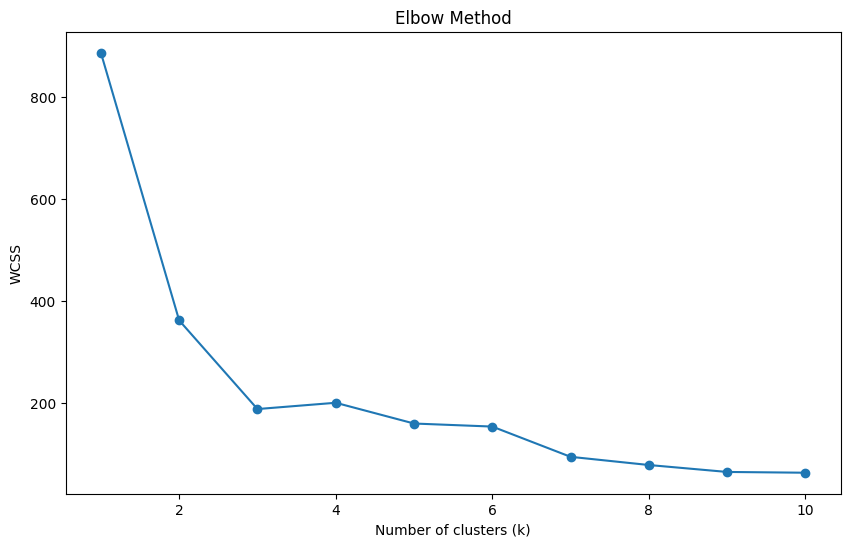

In [66]:
elbow_method(X_scaled, 10)

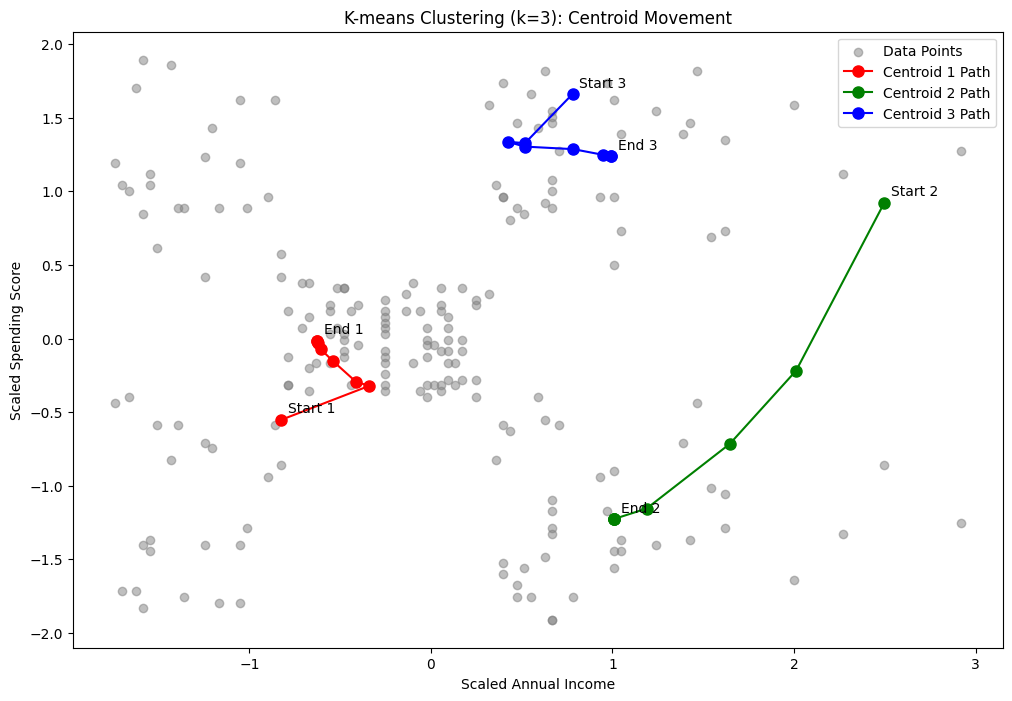

In [74]:
k = 3
clusters, centroids = kmeans_visualize_movement(X_scaled, k)

In [75]:
cluster_labels = np.zeros(len(X_scaled))
for i, cluster in enumerate(clusters):
    for point in cluster:
        cluster_labels[np.where((X_scaled == point).all(axis=1))[0][0]] = i

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"average silhouette: {silhouette_avg}")

average silhouette: 0.4518810825348478


In [76]:
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {len(cluster)} points")
print("Final centroids:", scaler.inverse_transform(centroids))

Cluster 1: 123 points
Cluster 2: 38 points
Cluster 3: 39 points
Final centroids: [[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]
